In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency


In [2]:
# Raw GitHub URL
url = "https://raw.githubusercontent.com/NGB-38/Data-Mining-Project/refs/heads/main/Dataset/Titanic-Dataset.csv"

# Read CSV file into a DataFrame
df= pd.read_csv(url)

# Display the first few rows
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
#Change "Survived" attribute into nominal variable instead of numeric variable
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
encoder = LabelEncoder()
df["Survived"] = df["Survived"].map({0: "Not Survived", 1: "Survived"})

print(df)


     PassengerId      Survived  Pclass  \
0              1  Not Survived       3   
1              2      Survived       1   
2              3      Survived       3   
3              4      Survived       1   
4              5  Not Survived       3   
..           ...           ...     ...   
886          887  Not Survived       2   
887          888      Survived       1   
888          889  Not Survived       3   
889          890      Survived       1   
890          891  Not Survived       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                   

In [4]:
# Show the descriptive statistics of all numeric values
analyzed_numeric_attributes= df.select_dtypes(include=['number']).describe()
analyzed_numeric_attributes

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
analyzed_nominal_attributes= df.select_dtypes(include=['object']).describe()
analyzed_nominal_attributes

,Survived,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,2,891,2,681,147,3
top,Not Survived,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,549,1,577,7,4,644


In [6]:
#Filling missing values with its median
df['Age'] = df['Age'].fillna(df['Age'].median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Not Survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Not Survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Not Survived,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,Survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,Not Survived,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,Survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#Show descriptive statistics after filling all NA
analyzed_numeric_attributes2= df.select_dtypes(include=['number']).describe()
analyzed_numeric_attributes2

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Filling missing values with its mode
Embarked_mode = df['Embarked'].mode()[0]  # Find the mode (most frequent value)
df["Embarked"] = df["Embarked"].fillna(Embarked_mode) # Fill missing values with the mode
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Not Survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Not Survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Not Survived,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,Survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,Not Survived,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,Survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
analyzed_nominal_attributes2= df.select_dtypes(include=['object']).describe()
analyzed_nominal_attributes2

,Survived,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,891
unique,2,891,2,681,147,3
top,Not Survived,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,549,1,577,7,4,646


In [10]:
#Merge 2 variables SibSp and Parch into Relatives
df['Relatives'] = df['SibSp'] +  df['Parch']

In [11]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Relatives
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.361582,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


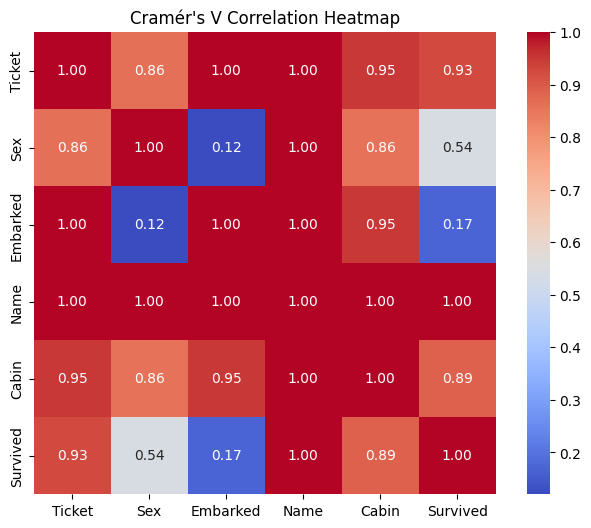

In [12]:
#Correlation matrix for categorical variables
def cramers_v(var1, var2):
    contingency_table = pd.crosstab(var1, var2)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

# Load dataset
# Compute Cramér's V for all categorical pairs
categorical_columns = ['Ticket', 'Sex', 'Embarked','Name','Cabin','Survived']  # Replace with your categorical columns
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to numeric for plotting
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Cramér's V Correlation Heatmap")
plt.show()

In [13]:
#Find columns which have many unique values to exclude them
high_card_cols = [col for col in df.select_dtypes(include='object') if df[col].nunique() > (50/100 * len(df))]
print("High cardinality columns:", high_card_cols)

High cardinality columns: ['Name', 'Ticket']


In [14]:
#USe p-value to see high cardinality attributes impact to the target variable
variables = ['Embarked', 'Name', 'Sex','Ticket']
alpha = 0.01  # Level of significance

# Loop through each variable and test significance
for var in variables:
    contingency_table = pd.crosstab(df[var], df['Survived'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < alpha:
        print(f"{var} has a significant relationship with the target (p = {p:.4f})")
    else:
        print(f"{var} has no significant relationship with the target (p = {p:.4f})")


Embarked has a significant relationship with the target (p = 0.0000)
Name has no significant relationship with the target (p = 0.4842)
Sex has a significant relationship with the target (p = 0.0000)
Ticket has no significant relationship with the target (p = 0.0115)


In [15]:
# Use correlation ratio to find the correlation between numeric variables and nominal variable("Survived")
# Define a function to calculate Correlation Ratio (η)
def correlation_ratio(categories, values):
    categories = pd.Categorical(categories)
    unique_categories = categories.categories
    overall_mean = values.mean()
    numerator = 0
    denominator = 0

    for cat in unique_categories:
        cat_values = values[categories == cat]
        numerator += len(cat_values) * (cat_values.mean() - overall_mean) ** 2
        denominator += ((cat_values - overall_mean) ** 2).sum()

    return np.sqrt(numerator / denominator) if denominator != 0 else 0

# Compute correlation ratio for all numeric attributes compared to "Survived"
numeric_columns = df.select_dtypes(include=[np.number]).columns
results = {}

for col in numeric_columns:
    results[col] = correlation_ratio(df["Survived"], df[col])

# Display the results
for col, corr in results.items():
    print(f"Correlation between 'Survived' and '{col}': {corr:.2f}")

Correlation between 'Survived' and 'PassengerId': 0.01
Correlation between 'Survived' and 'Pclass': 0.34
Correlation between 'Survived' and 'Age': 0.06
Correlation between 'Survived' and 'SibSp': 0.04
Correlation between 'Survived' and 'Parch': 0.08
Correlation between 'Survived' and 'Fare': 0.26
Correlation between 'Survived' and 'Relatives': 0.02


In [16]:
#Case1 :Make a new dataset after removing unnecessary features
columns_to_exclude = ['PassengerId','SibSp','Parch','Name','Cabin','Relatives','Age','Ticket','Embarked']
new_df = df.drop(columns=columns_to_exclude)
new_df


,Survived,Pclass,Sex,Fare
0,Not Survived,3,male,7.2500
1,Survived,1,female,71.2833
2,Survived,3,female,7.9250
3,Survived,1,female,53.1000
4,Not Survived,3,male,8.0500
...,...,...,...,...
886,Not Survived,2,male,13.0000
887,Survived,1,female,30.0000
888,Not Survived,3,female,23.4500
889,Survived,1,male,30.0000


In [17]:
#Case2 :Make a new dataset without removing unnecessary features
columns_to_exclude = ['PassengerId','SibSp','Parch','Name','Cabin','Ticket']
new_df2 = df.drop(columns=columns_to_exclude)
new_df2

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
0,Not Survived,3,male,22.0,7.2500,S,1
1,Survived,1,female,38.0,71.2833,C,1
2,Survived,3,female,26.0,7.9250,S,0
3,Survived,1,female,35.0,53.1000,S,1
4,Not Survived,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,Not Survived,2,male,27.0,13.0000,S,0
887,Survived,1,female,19.0,30.0000,S,0
888,Not Survived,3,female,28.0,23.4500,S,3
889,Survived,1,male,26.0,30.0000,C,0


In [18]:
Q1=new_df2["Age"].quantile(0.25)
Q3= new_df2["Age"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f'Age range: {lower_bound} - {upper_bound}')

Age range: 2.5 - 54.5


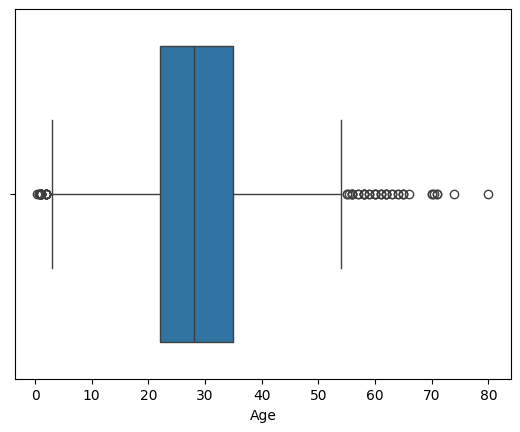

In [19]:
sns.boxplot(new_df2["Age"],orient='h')
plt.show()

In [20]:
Q1=new_df2["Relatives"].quantile(0.25)
Q3= new_df2["Relatives"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f'Relatives range: {lower_bound} - {upper_bound}')

Relatives range: -1.5 - 2.5


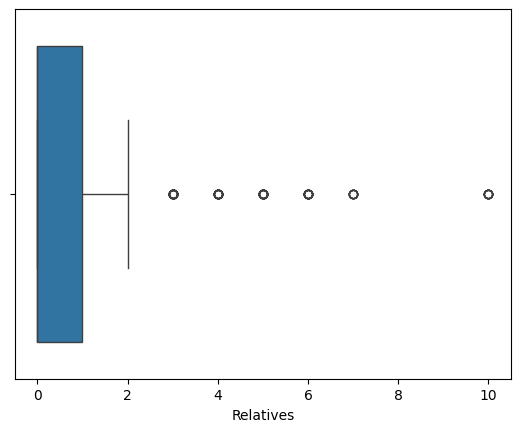

In [21]:
sns.boxplot(new_df2["Relatives"],orient='h')
plt.show()

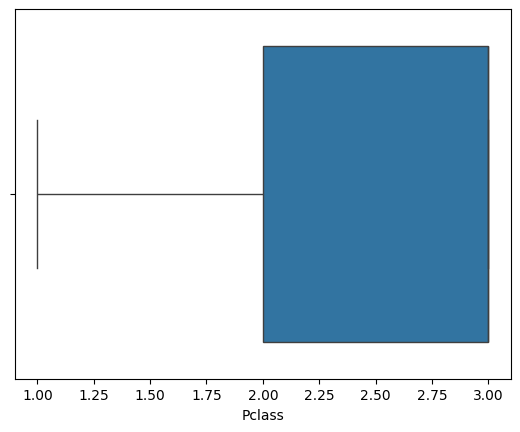

In [22]:
sns.boxplot(new_df2["Pclass"],orient='h')
plt.show()

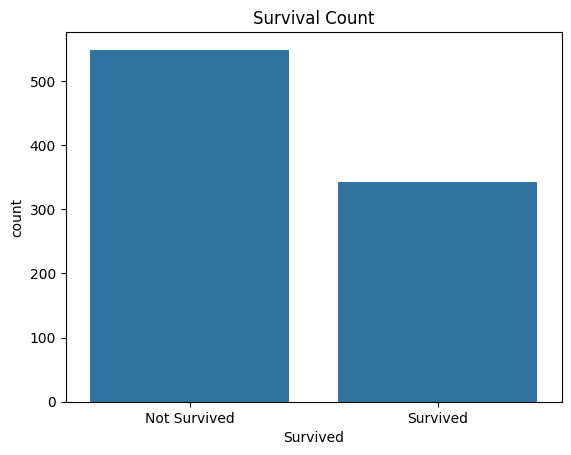

In [23]:
# Visualizing survival count
sns.countplot(x='Survived',data=new_df2)
plt.title('Survival Count')
plt.show()

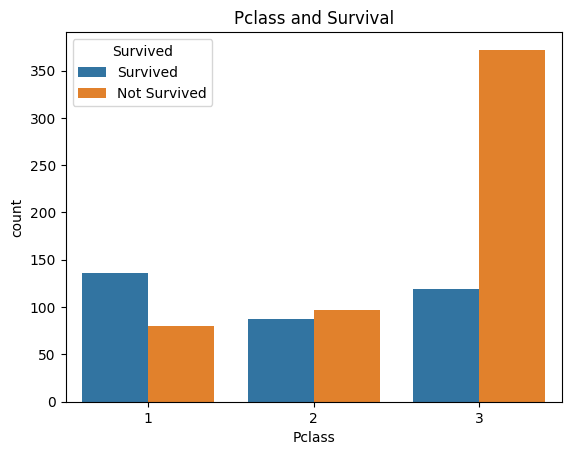

In [24]:
# Class distribution (1 :survived and 0: not survived)
sns.countplot(x='Pclass', data=new_df2, hue='Survived')
plt.title('Pclass and Survival')
plt.show()

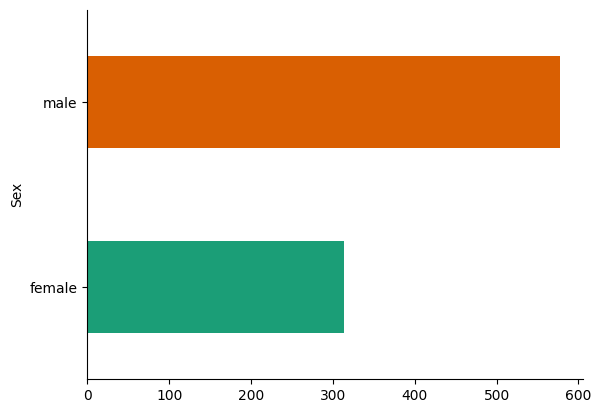

In [25]:
new_df2.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

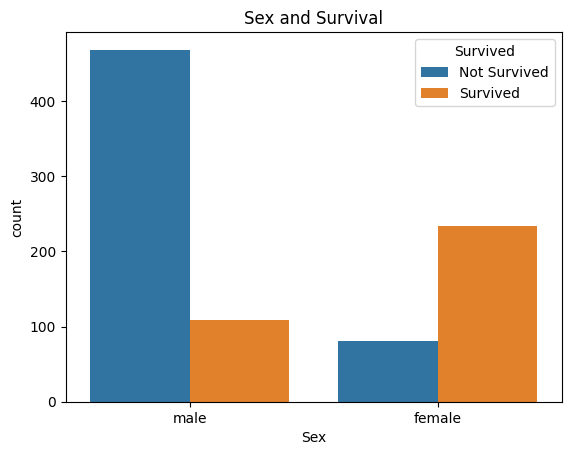

In [26]:
# Survival by gender
sns.countplot(x='Sex', hue='Survived', data=new_df2)
plt.title('Sex and Survival')
plt.show()

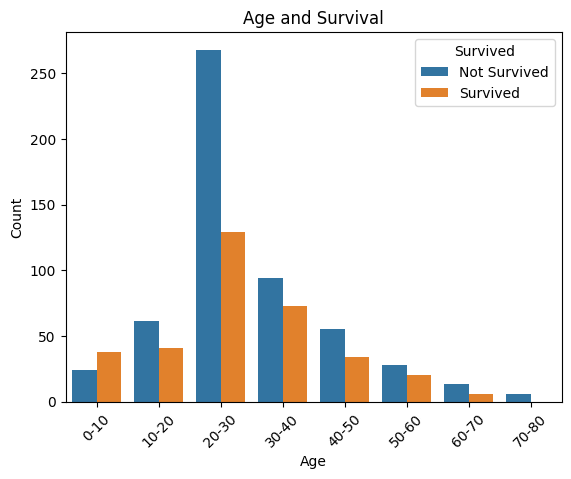

In [27]:
# Survived by age
bins = np.arange(0, 81, 10)
labels = [f'{i}-{i+10}' for i in bins[:-1]]
sns.countplot(
    x=pd.cut(new_df2['Age'], bins=bins, labels=labels, right=False),
    hue='Survived',
    data=new_df
)
plt.title('Age and Survival')
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



In [28]:
new_df.to_csv("Titanic-after-processing case 1.csv", index=False)
new_df

,Survived,Pclass,Sex,Fare
0,Not Survived,3,male,7.2500
1,Survived,1,female,71.2833
2,Survived,3,female,7.9250
3,Survived,1,female,53.1000
4,Not Survived,3,male,8.0500
...,...,...,...,...
886,Not Survived,2,male,13.0000
887,Survived,1,female,30.0000
888,Not Survived,3,female,23.4500
889,Survived,1,male,30.0000


In [29]:
new_df2.to_csv("Titanic-after-processing case 2.csv", index=False)
new_df2

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
0,Not Survived,3,male,22.0,7.2500,S,1
1,Survived,1,female,38.0,71.2833,C,1
2,Survived,3,female,26.0,7.9250,S,0
3,Survived,1,female,35.0,53.1000,S,1
4,Not Survived,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,Not Survived,2,male,27.0,13.0000,S,0
887,Survived,1,female,19.0,30.0000,S,0
888,Not Survived,3,female,28.0,23.4500,S,3
889,Survived,1,male,26.0,30.0000,C,0
